### Web Crawling (웹 크롤링) 
- Web Crawler (웹 크롤러): 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화 하는 프로그램 
- Web Crawler (웹 크롤러)가 하는 작업 
- requests와 BeautifulSoup 패키지 사용 

### 1. 웹 문서 전체 가져오기


In [7]:
from urllib.request import urlopen # request는 기본 모듈
import requests
from bs4 import BeautifulSoup as bs

- `urllib.request` 패키지 사용 


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
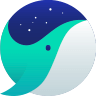
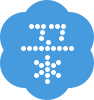

In [10]:
# from urllib.request import urlopen

html = urlopen("https://www.naver.com/") # 네이버 
soup = bs(html, "html.parser") # .text/.content 사용 X도 됨
print(soup)

- `requests` 패키지 사용 (최신에 나옴)


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
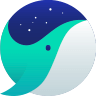
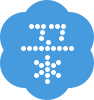

In [11]:
# import requests

html = requests.get("https://www.naver.com/") # 네이버 
soup = bs(html.text, "html.parser") # .text/.content 사용해야 함 !
print(soup)

### 2. html 태그에서 원하는 정보 추출하기
1) html 태그를 이용하는 방법  
    - `.find("태그")` : 첫번째 태그만 검색  
    - `.find_all("태그")`=`findAll()` : 전체 태그 검색 -> list형태로 반환  
2)

In [16]:
## .find() 사용 ## 

# class를 이용한 태그 검색 (** '_' 붙여야함 -> class_="")
find_div = soup.find("div", class_="group_nav")
find_div

# id를 이용한 검색 (** '_'필요 X -> id=""))
find_div = soup.find("div", id="NM_FAVORITE")
find_div

<div class="gnb_inner" id="NM_FAVORITE">
<div class="group_nav">
<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" 

In [29]:
## find_all 사용 ##  

# find_all -> list형태로 반환 
find_div = soup.find("div", class_="group_nav")
find_lst = find_div.find_all("li")
#find_lst[0]

for item in find_lst:
    print(item)
    print(item.find("a")["href"])  # ["href"] -> 태그 속성을 출력
    print(item.get_text())         # 모든 태그를 제거하고 텍스트만 남김
    print(item.text)               # 태그 내의 텍스트 추출
    print('-'*30)

<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
https://mail.naver.com/

메일


메일

------------------------------
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
https://section.cafe.naver.com/
카페
카페
------------------------------
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
https://section.blog.naver.com/
블로그
블로그
------------------------------
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
https://kin.naver.com/
지식iN
지식iN
------------------------------
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
https://shopping.naver.com/
쇼핑
쇼핑
------------------------------
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://s

#### CSS Selectoer

In [39]:
## .select("")

print(soup.select("#NM_FAVORITE>div.group_nav>ul.list_nav.type_fix"))# #id값>태그
print('-'*50)
print(soup.select("#NM_FAVORITE>div.group_nav>ul.list_nav.type_fix>li:nth-child(1)"))


[<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>


In [113]:
css_soup[0]

<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>
<

In [37]:
# 타겟 하나를 가지고 올 경우는 .select() 하나만 써도 되지만 
# .select() -> .find_all() 쓰는 경우 많아 ! 

css_soup = soup.select("#NM_FAVORITE>div.group_nav>ul.list_nav.type_fix")
css_a = css_soup[0].find_all("a")

for a in css_a:
    print(a.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV


#### [ 크롤링 연습 ]
- 네이버 지식인 -> "선릉역"검색 결과 가져오기
-https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1 # 디코딩 내용 (컴퓨터가 알아보는 내용)
- 한번에 너무 많이 크롤링하면 걸림ㅎㅎ

In [74]:
# 네이버 지식인 - "선릉역" 검색 
#https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1 # 디코딩 내용 (컴퓨터가 알아보는 내용)

import requests

# 크롤링 대상 URL
url = "https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1"
html = requests.get(url)            # url에서 데이터 요청 
soup = bs(html.text, "html.parser") # .text 붙여서 파싱 

# CSS를 이용한 태그 검색 
#s_content > div.section > ul
ul_soup = soup.select("#s_content>div.section>ul")

# 검색된 태그에서 다시 'li'검색 
li_soup = ul_soup[0].find_all("li") # 리스트 구조이기 떄문에 항상 [0] 따라와야해!

# 검색된 'li'에서 원하는 텍스트 크롤링 (추출)
print(li_soup[0].find("dt").get_text())
print(li_soup[0].find("dd").get_text())
print(li_soup[0].select("dl > dd:nth-child(3)")[0].get_text())




성수동에서 지하철 타서 선릉역까지 가

2022.02.05.
성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데... ▶ 거리비례제 요금을 말씀하신다면 - 성수역에서 선릉역은 약 11.2Km입니다.... 


#### [미션] 1페이지 검색 결과애서 전체 내용 가져오기
- 가져온 내용 분리하기 (제목 / 등록일 / 요약)
- 가져온 내용 각각 DataFrame으로 저장 

In [100]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

url = "https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1"
url_html = requests.get(url) 
soup = bs(url_html.text, "html.parser")


#s_content > div.section > ul > li:nth-child(1)
ul_soup = soup.select("#s_content>div.section>ul")
li_soup = ul_soup[0].find_all("li")


nav_kin=[]
for li in li_soup:
    title = li.find("dt").get_text().replace("\n","") # 제목
    date = li.find_all("dd")[0].get_text()            # 등록일
    doct = li.find_all("dd")[1].get_text()            # 요약
    #doct = li.select("dl>dd:nth-child(3)")[0].get_text() -> 위와 동일 
    nav_kin.append({"제목":title, "등록일": date, "요약": doct })
#print(nav_kin)

# DataFrame 구조로 변환하기
df = pd.DataFrame(nav_kin)
df


,제목,등록일,요약
0,성수동에서 지하철 타서 선릉역까지 가,2022.02.05.,성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데......
1,동서울터미널에서 선릉역 까지 노선 좀,2022.01.02.,"동서울터미널에서 선릉역 까지 노선 좀 알려주세요? ""강변 - 잠실나루 - 잠실 -..."
2,증미역에서 선릉역까지 가는 가장 빠른...,2021.09.12.,9호선일반 증미역에서 선릉역9호선급행까지 가는 방법이... 추천해주세요 출퇴근시간이...
3,선릉역누네안과 망막전문의 소개부탁드립,2022.02.15.,"선릉역누네안과 망막전문의 소개부탁드립니다,망막이 찢어졌다구 하는데, 전문의 추천부탁..."
4,선릉역에서 쉽게 택시탈수 있는곳,2021.03.31.,선릉역에서 감남세브란스가려고 하는데 몇번 출구로 나가야 택시가 많을까요??... 개...
5,선릉역에 있는 안과 예약했는데,2021.10.08.,저희 엄마 노안 때문에.. 치료 예약을 해놨습니다. 인터넷에서 보기로는 노안도 치료...
6,신림사거리 출발 선릉역 도착,2021.04.20.,심야버스 N61번 버스 신림역에서 선릉역까지 시간이 얼마나걸리나요? 29정거장 정...
7,선릉역이랑 제일 가까운 공원 없나요?,2022.01.08.,선릉역이랑 제일 가까운 공원 없나요? 가깝고 큰공원으로는 도산공원있습니다. 아래는...
8,선릉역에서 논현2동으로 싱글침대 옮기,2021.10.19.,선릉역에서 논현2동으로 싱글침대 옮기는 용달비용 궁금해요 용달 기사도움 8만원 입...
9,선릉역의 발음과 어떤 음운 변동이...,2021.04.11.,선릉역 발음이 설릉녁이라고 된다고 알고 있는데 맞나요 ?? 어떤 음운 변동 때문에....


In [85]:
ul_soup = soup.select("#s_content>div.section>ul> li:nth-child(1)")
ul_soup

[<li>
 <div class="thumb">
 <a class="_nclicks:kin.img" href="https://kin.naver.com/qna/detail.naver?d1id=8&amp;dirId=81203&amp;docId=411408538&amp;qb=7ISg66aJ7Jet&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><img alt="성수동에서 지하철 타서 선릉역까지 가" onerror="this.parentNode.parentNode.style.display='none';" src="https://kin-phinf.pstatic.net/20220205_200/16440671892476iHjr_PNG/image.png?type=m100"/></a>
 </div>
 <dl>
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.naver?d1id=8&amp;dirId=81203&amp;docId=411408538&amp;qb=7ISg66aJ7Jet&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank">성수동에서 지하철 타서 <b>선릉역</b>까지 가</a>
 </dt>
 <dd class="txt_inline">2022.02.05.</dd>
 <dd>성수동에서 지하철 타서 <b>선릉역</b>까지 가는 거로 1회용 지하철 카드? 그거 했는데... ▶ 거리비례제 요금을 말씀하신다면 - 성수역에서 <b>선릉역</b>은 약 11.2Km입니다.... </dd>
 <dd class="tag_area">
 </dd>
 <dd class="txt_block">
 <a class="txt_g1 _nclicks:kin.cat1" href="/search/list.nav

### 3. 검색어를 이용한 크롤링 
- `urllib` 패키지의 `parse`모듈 이용  
- `parse.quote()`: 문자열 -> 컴퓨터 언어로 인코딩 / `parse.unquote()` : 컴퓨터 언어 -> 사람 언어 문자열로 디코딩

In [105]:
### parser 모듈 사용법
from urllib import parse

text = "선릉역"

# 문자열 -> 컴퓨터 언어로 인코딩
enc = parse.quote(text) 
print(enc)
# 컴퓨터 언어 -> 사람 언어 문자열로 디코딩
dec = parse.unquote('%EC%84%A0%EB%A6%89%EC%97%AD')
print(dec)


%EC%84%A0%EB%A6%89%EC%97%AD
선릉역


In [106]:
from urllib import parse
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 검색어 입력 받기
text = input("검색어 입력:")

# 크롤링 대상 url
url = "https://kin.naver.com/search/list.naver?query="+ parse.quote(text)+ "&page=1"
url_html = requests.get(url) 
soup = bs(url_html.text, "html.parser")


# CSS를 이용한 태그 선택 검색
ul_soup = soup.select("#s_content>div.section>ul")
li_soup = ul_soup[0].find_all("li")


nav_kin=[]
for li in li_soup:
    title = li.find("dt").get_text().replace("\n","") # 제목
    date = li.find_all("dd")[0].get_text()            # 등록일
    doct = li.find_all("dd")[1].get_text()            # 요약
    #doct = li.select("dl>dd:nth-child(3)")[0].get_text() -> 위와 동일 
    nav_kin.append({"제목":title, "등록일": date, "요약": doct })
#print(nav_kin)

# DataFrame 구조로 변환하기
df = pd.DataFrame(nav_kin)
df


검색어 입력:선릉역 맛집


,제목,등록일,요약
0,이전했는데 선릉역 맛집 추천...,2021.12.20.,... 괜찮은 선릉역 맛집 있으면 꼭 추천 좀 부탁드릴게요!... 중이라 선릉역 맛...
1,"선릉역 맛집 추천좀, 근처로 이사왔어요.",2020.12.06.,"... 선릉역 맛집이 많다고 들었는데, 혹시 아시는데 있으면... 선릉역 맛집으로 ..."
2,선릉역 맛집 추천,2021.06.13.,선릉역 맛집 추천
3,선릉역 맛집 어딘가요??,2020.10.04.,선릉역 맛집하면 다 농민백암왕순대라고 하는데 맞나요?? 그 맞은편 조개구이무한리필...
4,[선릉역맛집] 회사주변 회식장소로...,2020.12.06.,... ^^ 분위기 좋고 맛있는 [선릉역맛집] 함께 찾아주세요 ! 선릉역 맛집으로...
5,선릉역맛집 분위기있는곳으로...,2011.07.11.,안녕하세요 선릉역맛집중에서 분위기있고 데이트하기에... 찾고있어요 선릉역맛집들 중에...
6,선릉역 맛집,2019.10.07.,선릉역 맛집 추천좀요 농민백암왕순대
7,선릉역맛집으로 데이트 할만한 장소 ?,2012.03.01.,선릉역맛집 추천바랍니다 여자친구와 다음주 월요일이 1주년인데요 여자친구 회사가......
8,선릉역 맛집어디에 있나요?,2013.06.20.,선릉역 맛집어디에 있나요? 선릉역7번출구 첫번째골목 샤브샤브 1번출구 이탈리안 레스...
9,강남역삼동/선릉역맛집으로...,2010.09.17.,... 괜찮은 강남 역삼동/선릉역맛집을 추천해주세요 고깃집같이 한번에 들어가는 시끄...


### 4. 검색된 내용 전체 (페이지 이동하기)
- 네이버 지식인에서 검색어에대한 데이터 가져오기

In [108]:
from urllib import parse
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 검색어 입력 받기
text = input("검색어 입력:")
nav_kin=[] 

# for문 안에서 데이터가 바뀌는대로 리스트안에 들어가 df 출력 (1페이지-10개/10페이지-100개)
for page in range(1,11):
    # 크롤링 대상 url
    url = "https://kin.naver.com/search/list.naver?query="+ parse.quote(text) 
    url = url + "&page=" + str(page)


    url_html = requests.get(url) 
    soup = bs(url_html.text, "html.parser")


    # CSS를 이용한 태그 선택 검색
    ul_soup = soup.select("#s_content>div.section>ul")
    li_soup = ul_soup[0].find_all("li")


    
    for li in li_soup:
        title = li.find("dt").get_text().replace("\n","") # 제목
        date = li.find_all("dd")[0].get_text()            # 등록일
        doct = li.find_all("dd")[1].get_text()            # 요약
        #doct = li.select("dl>dd:nth-child(3)")[0].get_text() -> 위와 동일 
        nav_kin.append({"제목":title, "등록일": date, "요약": doct })
    

df = pd.DataFrame(nav_kin)
df


검색어 입력:선릉역


,제목,등록일,요약
0,성수동에서 지하철 타서 선릉역까지 가,2022.02.05.,성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데......
1,동서울터미널에서 선릉역 까지 노선 좀,2022.01.02.,"동서울터미널에서 선릉역 까지 노선 좀 알려주세요? ""강변 - 잠실나루 - 잠실 -..."
2,증미역에서 선릉역까지 가는 가장 빠른...,2021.09.12.,9호선일반 증미역에서 선릉역9호선급행까지 가는 방법이... 추천해주세요 출퇴근시간이...
3,선릉역누네안과 망막전문의 소개부탁드립,2022.02.15.,"선릉역누네안과 망막전문의 소개부탁드립니다,망막이 찢어졌다구 하는데, 전문의 추천부탁..."
4,선릉역에서 쉽게 택시탈수 있는곳,2021.03.31.,선릉역에서 감남세브란스가려고 하는데 몇번 출구로 나가야 택시가 많을까요??... 개...
...,...,...,...
95,천안역에서 선릉역 2호선..?가는법좀,2018.06.05.,천안역에서 선릉역 2호선..?가는법좀요 ㅠㅠㅠ... 이동하시면 선릉역입니다. 3. ...
96,선릉역 472버스 막차시간,2014.09.01.,... 선릉역에올때쯤 막차시간이 몇시인가요?????? 또는... ㅠㅠ 빨리답변해주세...
97,선릉역 오피스텔 추천해주세염=!=,2013.08.23.,제가 선릉역 오피스텔로 이사를 하려고 합니다. 제발 상담좀 해주세요ㅠㅠ 특히 지금 ...
98,선릉역 HJ컨벤션센터가는법,2017.02.28.,... 이번에 선릉역 HJ컨벤션센터에 가야되는... 이번에 버스타고 서울에 가서 선...
